<a href="https://colab.research.google.com/github/irhallac/SisLab/blob/main/iris_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Ibrahim R Hallac
# https://github.com/irhallac
# Lojik kapıların Perceptron öğrenme algoritmasıyla modellenmesi

# credits for the Perceptron class: Aashir Javed
# Available: github.com/aashirjaved
# Perceptron-Machine-Learning-Using-Python-
# File: Perceptron.py

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

In [3]:
df = pandas.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)


In [4]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
cikis = df.iloc[0:100, 4].values
cikis = np.where(cikis == 'Iris-setosa', -1, 1)
giris = df.iloc[0:100, [0, 2]].values

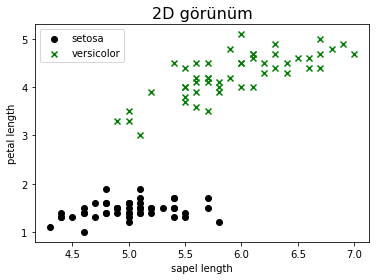

In [6]:
plt.title('2D görünüm', fontsize=16)

plt.scatter(giris[:50, 0], giris[:50, 1], color='black', marker='o', label='setosa')
plt.scatter(giris[50:100, 0], giris[50:100, -1], color='green', marker='x', label='versicolor')
plt.xlabel('sapel length')
plt.ylabel('petal length')
plt.legend(loc='upper left')

plt.show()

In [7]:
class Perceptron(object): 
    def __init__(self, ogrenme_orani=0.1, iter_sayisi=10):
        self.ogrenme_orani = ogrenme_orani
        self.iter_sayisi = iter_sayisi

    def ogren(self, X, y):
        self.w = np.zeros(1 + X.shape[1])
        #self.w = np.random.rand((1 + X.shape[1])) * 2
        self.hatalar = []
        for _ in range(self.iter_sayisi):
            hata = 0
            for xi, hedef in zip(X, y):
                degisim = self.ogrenme_orani * (hedef - self.tahmin(xi))
                self.w[1:] += degisim * xi
                self.w[0] += degisim
                hata += int(degisim != 0.0)
            self.hatalar.append(hata)
        return self

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def tahmin(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)

In [8]:
siniflandirici = Perceptron(ogrenme_orani=0.1, iter_sayisi=10)

In [9]:
siniflandirici.ogren(giris, cikis)

In [10]:
siniflandirici.w
     

array([-0.4 , -0.68,  1.82])

In [11]:
siniflandirici.hatalar

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]

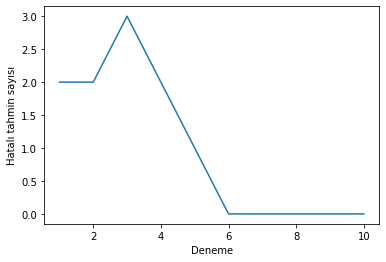

In [12]:
plt.plot(range(1, len(siniflandirici.hatalar) + 1), siniflandirici.hatalar)
plt.xlabel('Deneme')
plt.ylabel('Hatalı tahmin sayısı')
plt.show()